In [1]:
#invite people for the Kaggle party
import pandas as pd
import kaggle
import warnings
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Uploads the kaggleApi directly for easier use
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
# Startup the api and authenticate it using my kaggle key (which was previously downloaded into my directory and put on the .gitignore list for security purposes)
api = KaggleApi()
api.authenticate()

In [4]:
# Downloads the dataset into our directory, Since it's multiple files it comes as a .zip file
api.competition_download_files('house-prices-advanced-regression-techniques')

In [5]:
pwd

'C:\\Users\\User\\Documents\\GitHub\\CapstoneTwo'

In [6]:
with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip","r") as zip_ref:
    zip_ref.extractall() # If I don't specify a directory it goes into the current directory

In [2]:
with open('data_description.txt','r') as file:
    file1=file.read()

In [3]:
# this is the info file where I have all the different explanations of the categories within the columns.  
# I should use this to double check if the values in the columns are within range
print(file1) 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
# Import the train data
train = pd.read_csv('train.csv', )

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Alleys, FireplaceQu, PoolQC, Fence, MiscFeature are values with very high null rates

In [8]:
train['YrSold'].head()  # Looks like MoSold and YrSold are just integers but I think that's okay

0    2008
1    2007
2    2008
3    2006
4    2008
Name: YrSold, dtype: int64

In [9]:
train['MoSold'].describe()  #Months seem to be within 1-12 so that's good

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

In [10]:
train['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [11]:
uniqueness = {n:train[n].unique() for n in train.keys()} # This gives me all the unique values to compare to description.txt.

In [12]:
Missing = {n:train[n].isna() for n in train.keys()}

In [13]:
Missing_data=pd.DataFrame(Missing).sum()
Missing_data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
# The missing data.
Missing_data[Missing_data>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
train_clean = train.dropna(subset = ['Electrical'])

In [16]:
# It looks like some of the houses have NaN in the Masenry Veneer Type.  Looking at the category 'None' some of them have area and some don't  
# So I must descide if the ones with NaN are area 0 and type None or should I drop them
# So I have two questions.  Are the ones with 'None' and have an area the error or are the NaN values actually None type and 0 area?
train_clean[train_clean['MasVnrType']=='None']['MasVnrArea'].describe()

count    863.000000
mean       1.096176
std       18.580390
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      344.000000
Name: MasVnrArea, dtype: float64

In [17]:
MasVnrType_None =train_clean[train_clean['MasVnrType']=='None']['MasVnrArea']

In [18]:
MasVnrType_None.describe()

count    863.000000
mean       1.096176
std       18.580390
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      344.000000
Name: MasVnrArea, dtype: float64

In [19]:
# Well there are five of these.  Clearly 1 is not good data. Can't have one ft of masenry.  so those have to go.  I'm going to guess that the rest are probably mis classified as "None"
MasVnrType_None[MasVnrType_None>0]

624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

In [20]:
# For the data that has a Vaneer type there are still some that equal 0 feet.  That also seems like bad data.
train_clean[train_clean['MasVnrType']!='None']['MasVnrArea'].describe()

count     588.000000
mean      254.430272
std       205.620539
min         0.000000
25%       112.750000
50%       202.500000
75%       329.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [21]:
MasVnrType_Some = train_clean[train_clean['MasVnrType']!='None']['MasVnrArea']

In [22]:
# Two entries that need to go
MasVnrType_Some[MasVnrType_Some==0]

688     0.0
1241    0.0
Name: MasVnrArea, dtype: float64

In [23]:
# Removes the Vaneered masenry that had area of zero
train_clean2=train_clean.drop(train_clean[(train_clean['MasVnrType']!='None') & (train_clean['MasVnrArea'] == 0.0)].index)
train_clean2[train_clean2['MasVnrType']!='None']['MasVnrArea'].describe()

count     586.000000
mean      255.298635
std       205.431939
min        11.000000
25%       113.250000
50%       203.000000
75%       331.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [24]:
# Removes the non-vaneered masenry that have area above zero
train_clean2=train_clean2.drop(train_clean2[(train_clean2['MasVnrType']=='None') & (train_clean2['MasVnrArea'] > 0.0)].index)
train_clean2[train_clean2['MasVnrType']=='None']['MasVnrArea'].describe()

count    858.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: MasVnrArea, dtype: float64

In [25]:
train_clean2['MasVnrType'].describe()

count     1444
unique       4
top       None
freq       858
Name: MasVnrType, dtype: object

In [26]:
train_clean2['MasVnrArea'].fillna(0)

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1452, dtype: float64

In [27]:
# Setting the MasVnrType NaN to 'None'
train_clean2['MasVnrType'].fillna(value = 'None', inplace=True)
train_clean2['MasVnrType'].unique() # Checking if it worked

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [28]:
# Setting the corresponding NaN in MasVnrArea to 0
train_clean2['MasVnrArea'].fillna(value = 0, inplace=True)
train_clean2['MasVnrArea'].isna().sum() # Checking if it worked

0

In [29]:
# No duplicate Id's so that's a positive
train_clean.duplicated(subset=['Id']).sum()

0

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

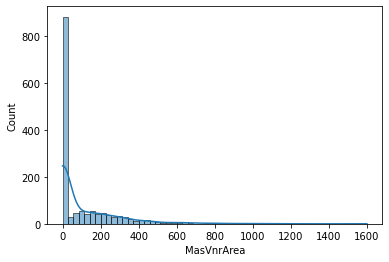

In [30]:
sns.histplot(data=train_clean2, x="MasVnrArea", kde=True)

In [31]:
train_clean2['MasVnrArea'].describe()

count    1452.000000
mean      103.033747
std       180.869946
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [32]:
Missing=train_clean2.isna().sum()
Missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      257
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [33]:
Missing[Missing>0]

LotFrontage      257
Alley           1361
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      686
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1445
Fence           1171
MiscFeature     1399
dtype: int64

In [36]:
train_clean2['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [37]:
train_clean2['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [ ]:
#Looks like the categories which have NA as one of their options has automatically been turned into a .NaN

In [ ]:
# So I have 43 categorical columns and what I need to do is to either turn all my categories into numbers or I need to try something else

In [38]:
# first I need to collect all my categories
cat_columns = train_clean2.select_dtypes(['object']).columns

In [39]:
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
list(cat_columns)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
# one option is I can factorize these columns, but some of the data are 5-1 being good to poor and others are not so clear
# Is there a way to factorize the columns in reverse order?  I think for almost all of the data this would work.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

### I coppied and pasted the descriptions into an Excel Spreadsheet and made a conversion suggestion.  But this was tedious and doesn't seem to work well

In [179]:
excel = pd.read_excel('C:\\Users\\User\\Documents\\GitHub\\CapstoneTwo\\Data\\Zillow_Datasets\\Translations.xlsx')

In [180]:
excel.head()

,Categorical Data,Numeric Conversion,Numeric Data,DateTime Data
0,MSSubClass: Identifies the type of dwelling in...,NaN,LotFrontage: Linear feet of street connected t...,YearBuilt: Original construction date
1,20: 1-STORY 1946 & NEWER ALL STYLES,1.0,LotArea: Lot size in square feet,YearRemodAdd: Remodel date (same as constructi...
2,30: 1-STORY 1945 & OLDER,2.0,MasVnrArea: Masonry veneer area in square feet,GarageYrBlt: Year garage was built
3,40: 1-STORY W/FINISHED ATTIC ALL AGES,3.0,BsmtFinSF1: Type 1 finished square feet,MoSold: Month Sold (MM)
4,45: 1-1/2 STORY - UNFINISHED ALL AGES,4.0,BsmtFinSF2: Type 2 finished square feet,YrSold: Year Sold (YYYY)


In [182]:
excel['Categorical Data']=excel['Categorical Data'].str.split(': ')
excel['Numeric Data']=excel['Numeric Data'].str.split(': ')
excel['DateTime Data']=excel['DateTime Data'].str.split(': ')

In [184]:
excel.head()

,Categorical Data,Numeric Conversion,Numeric Data,DateTime Data
0,"[MSSubClass, Identifies the type of dwelling i...",NaN,"[LotFrontage, Linear feet of street connected ...","[YearBuilt, Original construction date]"
1,"[20, 1-STORY 1946 & NEWER ALL STYLES]",1.0,"[LotArea, Lot size in square feet]","[YearRemodAdd, Remodel date (same as construct..."
2,"[30, 1-STORY 1945 & OLDER]",2.0,"[MasVnrArea, Masonry veneer area in square feet]","[GarageYrBlt, Year garage was built]"
3,"[40, 1-STORY W/FINISHED ATTIC ALL AGES]",3.0,"[BsmtFinSF1, Type 1 finished square feet]","[MoSold, Month Sold (MM)]"
4,"[45, 1-1/2 STORY - UNFINISHED ALL AGES]",4.0,"[BsmtFinSF2, Type 2 finished square feet]","[YrSold, Year Sold (YYYY)]"


In [190]:
for n in excel:
    print (excel[n][0:2])

0    [MSSubClass, Identifies the type of dwelling i...
1                [20, 1-STORY 1946 & NEWER ALL STYLES]
Name: Categorical Data, dtype: object
0    NaN
1    1.0
Name: Numeric Conversion, dtype: float64
0    [LotFrontage, Linear feet of street connected ...
1                   [LotArea, Lot size in square feet]
Name: Numeric Data, dtype: object
0              [YearBuilt, Original construction date]
1    [YearRemodAdd, Remodel date (same as construct...
Name: DateTime Data, dtype: object


**I need to change how my data is organized.  I need to have the sub categories within the major categories**